In [1]:
#A_ch03_002a.ipynb
#縮放訓練和測試資料資料集影響說明

In [2]:
#以make_blobs, 產生虛擬資料
import mglearn
from sklearn.datasets import  make_blobs

In [3]:
#產生5團共50個資料點
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)

In [4]:
#1.將 X 分成訓練資料集(X_train)和測試資料集(X_test), 比例為 9:1
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

In [5]:
#2.用MinMaxScaler縮放資料 (X_train, X_test)
#一起縮放, 這是正確做法!
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
#3. 分開重新縮放訓練與測試資料集，這會迫使 X_test 最小和最大值成為 0 and 1
#   注意!這裡純為說明用途，我們不希望這麼做!
test_scaler=MinMaxScaler() 
test_scaler.fit(X_test)    #以 X_test fit MinMaxScaler, 自成一格
X_test_scaled_badly=test_scaler.transform(X_test)

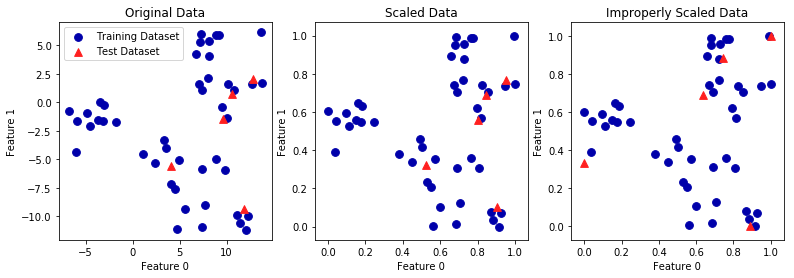

In [8]:
#繪製檢視 
import matplotlib.pyplot as plt
%matplotlib inline

#檢視原始資料 (Original Data)
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],
               c=mglearn.cm2(0), label='Training Dataset',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',
               c=mglearn.cm2(1), label='Test Dataset',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

#檢視一起縮放資料特性: 
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],
               c=mglearn.cm2(0),label='Training Dataset',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',
               c=mglearn.cm2(1),label='Test Dataset',s=60)
axes[1].set_title('Scaled Data')

#檢視錯誤縮放(各自為政)資料特性
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],
               c=mglearn.cm2(0),label='Training Dataset',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',
               c=mglearn.cm2(1),label='Test Dataset',s=60)
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')